# Исследование

<h3> Бриф <a class="tocSkip"></h2>

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Перед нами данные до 2016 года, и мы планируем кампанию на 2017-й.

<h3> Цель исследования <a class="tocSkip"></h2>

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<h3> План работы <a class="tocSkip"></h2>

1. Входные данные — сторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Следует определить качество данных, соответственно первым шагом будет являться их обзор
2. Предобработка данных
3. Исследовательский анализ данных, визуализация общей информации о пользователях и играх, поиск зависимостей
4. Составление портрета пользователя каждого региона
5. Проверка гипотез на основе входных данных
6. Общий вывод

####

### Обзор данных

In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
# чтение файла
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточный вывод**

При осмотре данных были выявлены следующие моменты:
1. Названия столбцов начинаются с заглавной буквы
2. `'Year_of_Release'` обладает вещественным типом данных, `'User_Score'` заполнен строковыми значениями
3. Присутстсвуют пропуски в столбцах `'Name'`, `'Year_of_Release'`, `'Genre'`, `'Critic_Score'`, `'User_Score'`, `'Rating'`

####

### Предобработка данных

In [5]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# посмотрим на количество пропусков в столбцах
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

По два пропуска в `'name'` и `'genre'` и 269 в `'year_of_release'`. Эти пропуски можно удалить, в таком количестве это не повлияет на дальнейший анализ, к тому же их сложно восстановить, не исказив при этом распределение.

Пропуски здесь могли появиться как из-за технических ошибок, так и реальной не популярности игр.

In [7]:
games = games.dropna(subset=['name', 'year_of_release', 'genre'])
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Остаются пропуски в столбцах с оценками, что достаточно естественно (люди, не всегда ставят оценки и отзывы, зачастую пропускают этот шаг). Пропусков слишком много, чтобы их удалять, поэтому их можно оставить.

In [8]:
# проверим список уникальных значений в оценках пользователей
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**tbd** — это аббревиатура, которая обозначает «to be determined» (англ. «будет определено»). Это выражение используется в различных областях и означает, что некоторые детали еще не известны или не определены.

In [9]:
# заменим tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [10]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [11]:
# изменим тип данных
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
# рассчет суммарных продаж игр по регионам
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [13]:
# проверка на явные дубликаты
games.duplicated().sum()

0

In [14]:
# проверим на неполные дубликаты
games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [15]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

**Промежуточный вывод**

В ходе предобработки данных были выполнены следующие мероприятия:
1. Замена названий столбцов на более приятные
2. Обработка пропусков и анализ их появления в данных
3. Изменение типов данных
4. Рассчет суммарных продаж во всех регионах
5. Не было найдено полных дубликатов, только один неполный

####

### Исследовательский анализ данных

**статистика выпуска игр по годам**

In [16]:
games_per_year = games.pivot_table(index='year_of_release', values='name' ,aggfunc='count')
games_per_year.columns = ['count']
games_per_year.head()

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


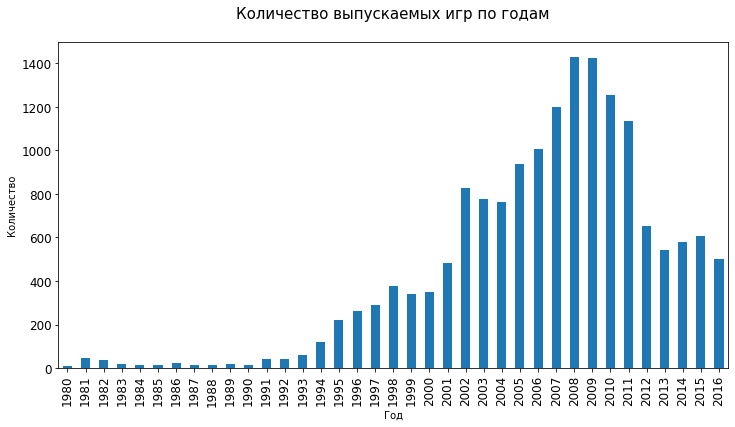

In [17]:
games_per_year.plot(kind='bar',
                    figsize = (12,6), 
                    legend = False, 
                    fontsize = 12)

plt.title('Количество выпускаемых игр по годам' + "\n", fontsize=15)
plt.xlabel('Год')
plt.ylabel('Количество');

На графике можно заметить, что активным рост количества выпускаемых игр начинается с 1993 года, что можно объяснить технологическим развитием и увеличением количества компьютеров. В 2002 году случился резкий рост, а пик выпуска приходится на 2008 и 2009 годы. Впоследствии объемы выпуска компьютреных игр уменьшаются, что может быть связано с использованием мобильных устройств как основных.

Логично рассматривать данные в период с 2001 г.

**продажи по платформам**

In [18]:
sale_plat = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sale_plat.columns = ['sum']
sale_plat = sale_plat.sort_values('sum')

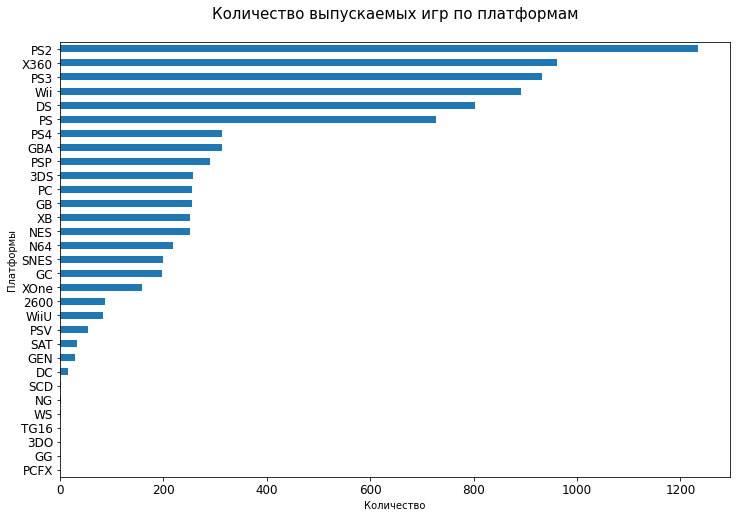

In [19]:
sale_plat.plot(kind = 'barh', 
               figsize = (12,8), 
               legend = False, 
               fontsize = 12)

plt.title('Количество выпускаемых игр по платформам' + "\n", fontsize=15)
plt.xlabel('Количество')
plt.ylabel('Платформы');

Для анализа возьмем топ-5 платформ: PS2, X360, PS3, Wii, DS

In [20]:
# создаем сводную таблицу с суммарными продажами по годам
sales_by_platform_year = games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# выбираем топ-5 платформ с наибольшими суммарными продажами
top_platforms = sale_plat.sort_values('sum', ascending=False).head().index

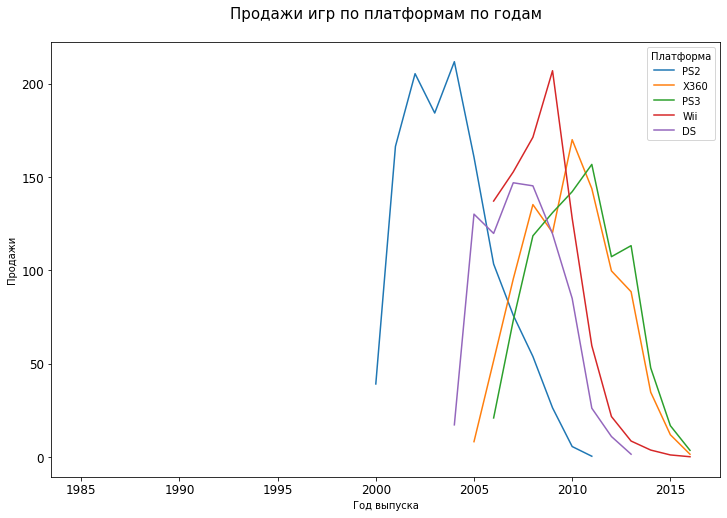

In [21]:
# строим графики продаж для выбранных платформ по годам
sales_by_platform_year[top_platforms].plot(kind='line',
                                           figsize=(12, 8),
                                           fontsize=12)

plt.title('Продажи игр по платформам по годам' + "\n", fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.legend(title='Платформа');

На графике прослеживается определенный паттерн: жизненный цикл платформы, занимающейся созданием и продажей компьютерных игр, в среднем составляет 10 лет.

Для того, чтобы построить прогноз на 2017 год, следует определить актуальный период, который будет отражать релевантные данные для анализа. 

Для построения прогноза на 2017 год следуют использовать релефантные данные, близкие к нынешнему периоду. Поэтому временные рамки будут определены следующими рамками: 2012-2016 гг.

In [22]:
actual_data = games.query('year_of_release >= 2012')

**динамика продаж по платформам**

In [23]:
actual_sales = actual_data.pivot_table(index='platform', values='total_sales' ,aggfunc='sum')
actual_sales = actual_sales.sort_values('total_sales', ascending=False)
actual_sales.head()

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32


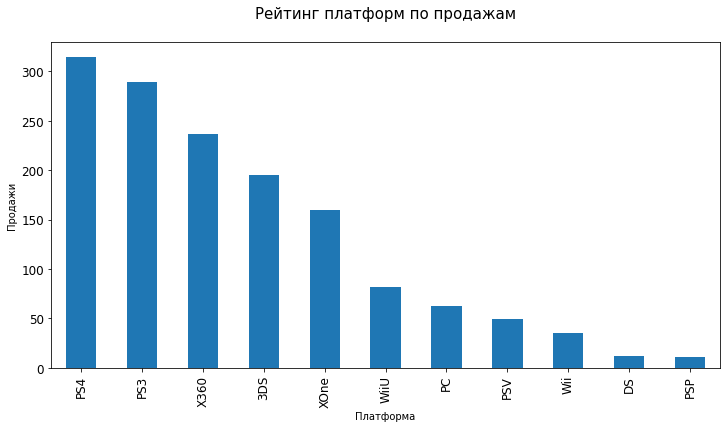

In [24]:
actual_sales.plot(kind='bar',
                  figsize = (12,6), 
                  legend = False, 
                  fontsize = 12)

plt.title('Рейтинг платформ по продажам' + "\n", fontsize=15)
plt.xlabel('Платформа')
plt.ylabel('Продажи');

Безусловными лидерами по продажам можно назвать PS4, PS3, X360. 

Однако данный график показывает лишь объем продаж, а не их динамику на момент 2016 года.

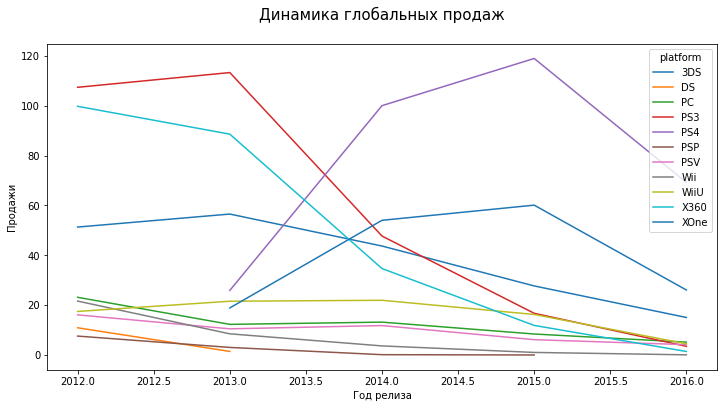

In [25]:
actual_dynamics = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_dynamics.plot(figsize=(12,6))
plt.title('Динамика глобальных продаж' + "\n", fontsize=15)
plt.xlabel('Год релиза')
plt.ylabel('Продажи');

Видим, что все платформы терпят снижение глобальных продаж. Однако большинство продолжительное время находится на минимуме продаж, кроме двух платформ, которые только с 2015 года претерпевают снижение уровня продаж: PS4 и XOne.

Рассмотрим подробнее значения глобальных продаж потенциально прибыльных платформ.

In [26]:
dynamics_top = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
dynamics_top = dynamics_top[['PS4', 'PS3', 'X360', '3DS', 'XOne']]
dynamics_top

platform,PS4,PS3,X360,3DS,XOne
year_of_release,,,,,
2012,NaN,107.35,99.74,51.36,NaN
2013,25.99,113.25,88.58,56.57,18.96
2014,100.00,47.76,34.74,43.76,54.07
2015,118.90,16.82,11.96,27.78,60.14
2016,69.25,3.60,1.52,15.14,26.15


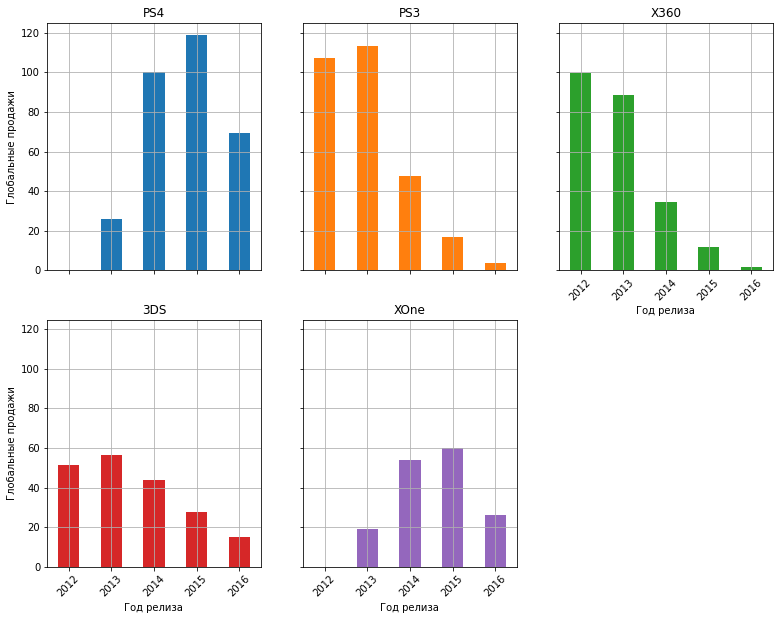

In [27]:
dynamics_top.plot(subplots=True,
                  layout=(2, 3),
                  kind='bar',
                  figsize=(13, 10),
                  sharey=True,
                  grid=True,
                  legend=False,
                  rot=45,
                  xlabel='Год релиза',
                  ylabel='Глобальные продажи'
                 )
plt.show()


Видим, что все платформы терпят снижение общих продаж, кто-то уже давно, а, например, у PS4 снижение началось только в 2016 году. Нельзя также забывать, что данные по 2016 году ещё не полные.

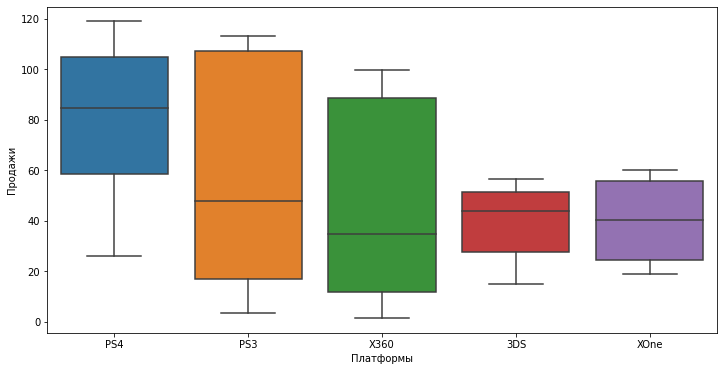

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=dynamics_top)
plt.xlabel('Платформы')
plt.ylabel('Продажи');

Медианное значение глобальных продаж выше всего у PS4 (почти в два раза больше, чем у остальных).

**влияние отзывов на продажи**

In [29]:
ps4 = actual_data[['platform', 'user_score', 'critic_score', 'total_sales']].query('platform == "PS4"')
ps3 = actual_data[['platform', 'user_score', 'critic_score' ,'total_sales']].query('platform == "PS3"')
x360 = actual_data[['platform', 'user_score', 'critic_score' ,'total_sales']].query('platform == "X360"')

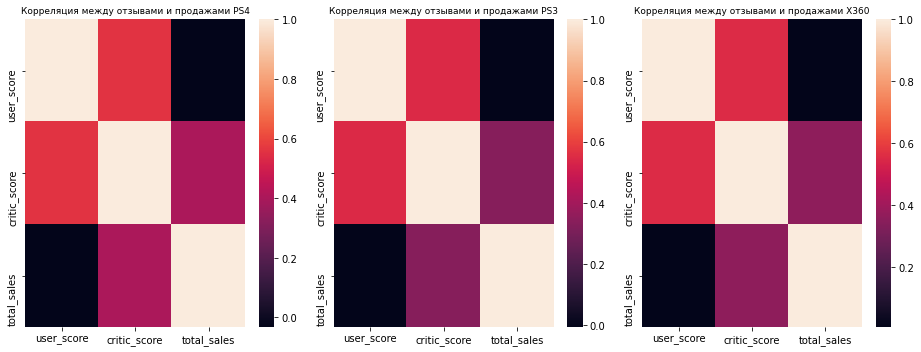

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

sns.heatmap(ps4.corr(), ax=axes[0])
axes[0].set_title('Корреляция между отзывами и продажами PS4', fontsize=9)

sns.heatmap(ps3.corr(), ax=axes[1])
axes[1].set_title('Корреляция между отзывами и продажами PS3', fontsize=9)

sns.heatmap(x360.corr(), ax=axes[2])
axes[2].set_title('Корреляция между отзывами и продажами X360', fontsize=9)

plt.tight_layout()
plt.show()

Нельзя сказать, что прослеживается сильная корреляция между продажами и отзывами как пользователей, так и критиков.

Причем, корреляция между отзывами критиков и продажами есть, но очень низкая (около 0.3), а отзывы пользователей в принципе не влияют на успешность продаж.

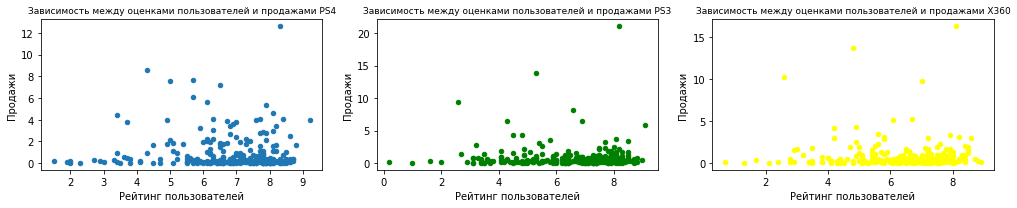

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3))

ps4.plot(x='user_score', y='total_sales', kind='scatter', ax=axes[0])
axes[0].set_title('Зависимость между оценками пользователей и продажами PS4', fontsize=9)
axes[0].set_xlabel('Рейтинг пользователей')
axes[0].set_ylabel('Продажи')

ps3.plot(x='user_score', y='total_sales', kind='scatter', color='green', ax=axes[1])
axes[1].set_title('Зависимость между оценками пользователей и продажами PS3', fontsize=9)
axes[1].set_xlabel('Рейтинг пользователей')
axes[1].set_ylabel('Продажи')

x360.plot(x='user_score', y='total_sales', kind='scatter', color='yellow', ax=axes[2])
axes[2].set_title('Зависимость между оценками пользователей и продажами X360', fontsize=9)
axes[2].set_xlabel('Рейтинг пользователей')
axes[2].set_ylabel('Продажи')

plt.tight_layout()
plt.show()

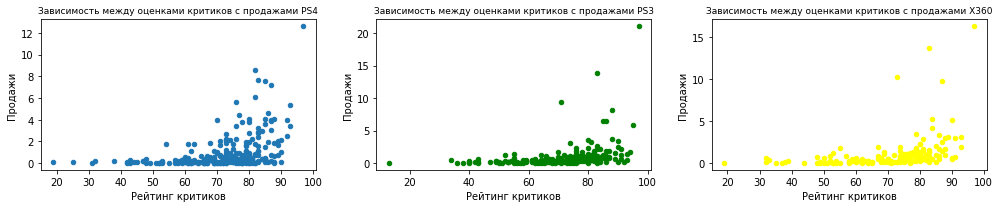

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3))

ps4.plot(x='critic_score', y='total_sales', kind='scatter', ax=axes[0])
axes[0].set_title('Зависимость между оценками критиков с продажами PS4', fontsize=9)
axes[0].set_xlabel('Рейтинг критиков')
axes[0].set_ylabel('Продажи')

ps3.plot(x='critic_score', y='total_sales', kind='scatter', color='green', ax=axes[1])
axes[1].set_title('Зависимость между оценками критиков с продажами PS3', fontsize=9)
axes[1].set_xlabel('Рейтинг критиков')
axes[1].set_ylabel('Продажи')

x360.plot(x='critic_score', y='total_sales', kind='scatter', color='yellow', ax=axes[2])
axes[2].set_title('Зависимость между оценками критиков с продажами X360', fontsize=9)
axes[2].set_xlabel('Рейтинг критиков')
axes[2].set_ylabel('Продажи')

plt.tight_layout()
plt.show()

Сильной зависимости между отзывами и продажами на графиках не наблюдается. Скопление точек все же обозначает определенную тенденцию: чем выше оценки, тем выше продажи. Но на продажи могут влиять различные факторы, поэтому не все так однозначно.

**общее распределение игр по жанрам**

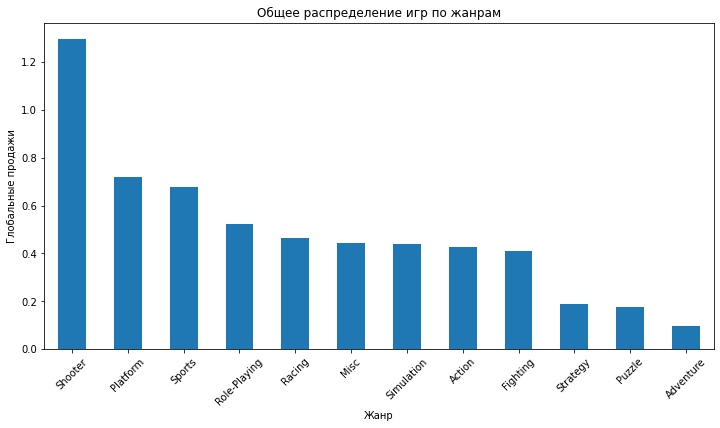

In [33]:
genre_pop = (actual_data
            .pivot_table(index='genre', values='total_sales')
            .sort_values('total_sales', ascending=False)
            .plot(kind='bar', y='total_sales', figsize=(12, 6), rot=45, legend=False)
            .set(title='Общее распределение игр по жанрам', xlabel='Жанр', ylabel='Глобальные продажи'))

Самыми популярными жанрами является Shooter, после него почти на одном уровне Platform и Sports

**Промежуточный вывод**

В рамках исследовательского анализа данных были сделаны следующие выводы:
1. На исторических данных видно, что активный рост количества выпускаемых игр начинается с 1993 года,  в 2002 году случился резкий рост, а пик выпуска приходится на 2008 и 2009 годы.
2. Жизненный цикл платформы, занимающейся созданием и продажей компьютерных игр, в среднем составляет 10 лет.
3. На данный момент все платформы терпят снижение глобальных продаж, большинство продолжительное время находится на минимуме продаж, кроме двух платформ: PS4 и XOne.
4. Корреляция между продажами и отзывами как пользователей, так и критиков, не прослеживается
5. Самыми популярным игровым жанром является shooter.

####

### Портрет пользователя каждого региона

In [34]:
# функция для агрегирования данных
def pivot_func(col):
    return (
    actual_data
        .pivot_table(index=col, values=region, aggfunc='sum')
        .sort_values(region, ascending=False)
        .head()
    )

In [35]:
# функция для построения круговой диаграммы
def pie_chart(data):
    return (
    data
        .plot(y=region, 
               kind='pie', 
               figsize=(12, 7),
               autopct='%1.0f%%')
    )

**Северная Америка**

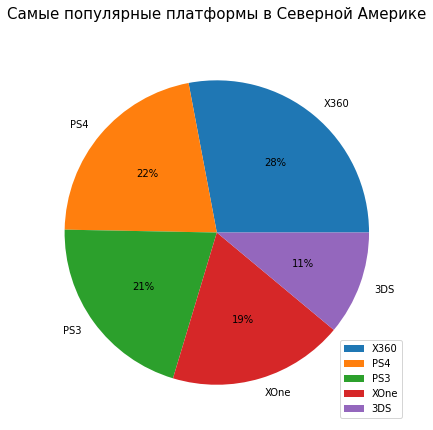

In [47]:
region = 'na_sales'
pie_chart(pivot_func('platform'))
plt.title('Самые популярные платформы в Северной Америке' + "\n", fontsize=15)
plt.ylabel('');

Xbox занимает треть северо-американского рынка и лидирует на нем, на втором месте идут консоли PS4 и PS3, занимающие по 22%, после XOne, 3DS

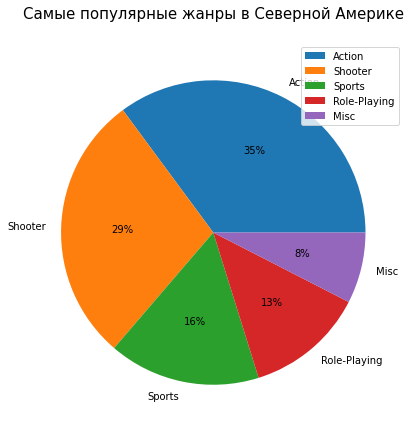

In [37]:
pie_chart(pivot_func('genre'))
plt.title('Самые популярные жанры в Северной Америке' + "\n", fontsize=15)
plt.ylabel('');

Самыми продаваемыми жанрами в Северной Америке явлются Action, Sports, Shooter, что совпадает с общемировым распределением игр по жанрам.

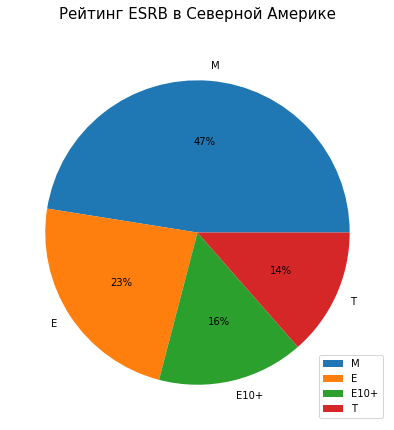

In [48]:
pie_chart(pivot_func('rating'))
plt.title('Рейтинг ESRB в Северной Америке' + "\n", fontsize=15)
plt.ylabel('');

Большинство игр (38%) имеют категорию M (mature), т.е. большиство игр ориентированно именно на взрослую аудиторию (17+)

**Европа**

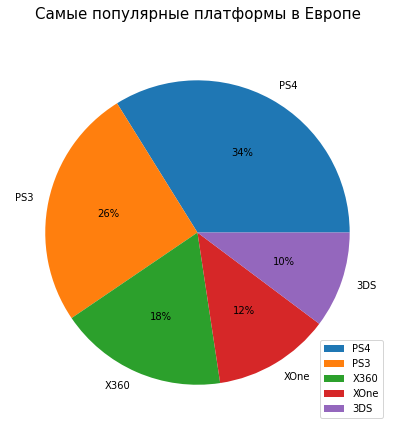

In [49]:
region = 'eu_sales'
pie_chart(pivot_func('platform'))
plt.title('Самые популярные платформы в Европе' + "\n", fontsize=15)
plt.ylabel('');

Лидирующие позиции на европейском рынке занимает PS4 и PS3.

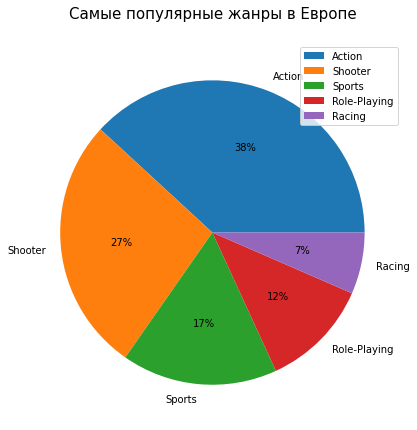

In [40]:
pie_chart(pivot_func('genre'))
plt.title('Самые популярные жанры в Европе' + "\n", fontsize=15)
plt.ylabel('');

Все также самыми продаваемыми жанрами явлются Action, Sports, Shooter.

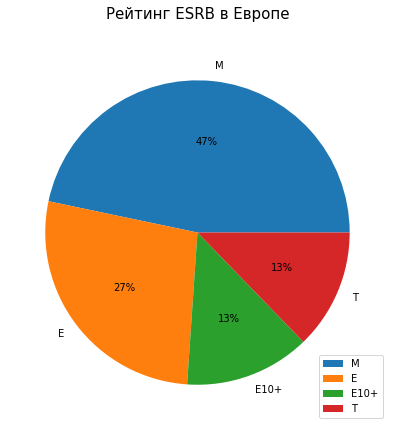

In [50]:
pie_chart(pivot_func('rating'))
plt.title('Рейтинг ESRB в Европе' + "\n", fontsize=15)
plt.ylabel('');

В Европе также почти половина игр производится для взрослой аудитории, а 27% игр имеет маркировку для всех возрастов

**Япония**

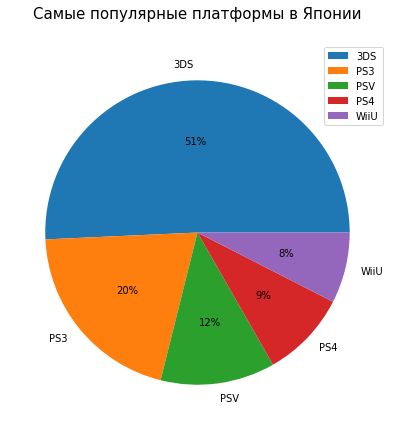

In [51]:
region = 'jp_sales'
pie_chart(pivot_func('platform'))
plt.title('Самые популярные платформы в Японии' + "\n", fontsize=15)
plt.ylabel('');

На японском рынке самой успешной игровой компанией является Nintendo: консоль 3DS лидирует на рынке, PS3 занимает 2 место. PS4 занимает 9% рынка.

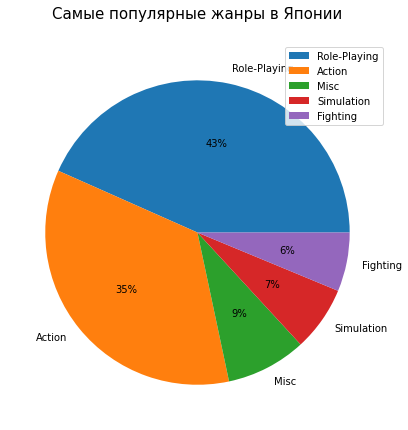

In [43]:
pie_chart(pivot_func('genre'))
plt.title('Самые популярные жанры в Японии' + "\n", fontsize=15)
plt.ylabel('');

Также как и в европе и северной америке

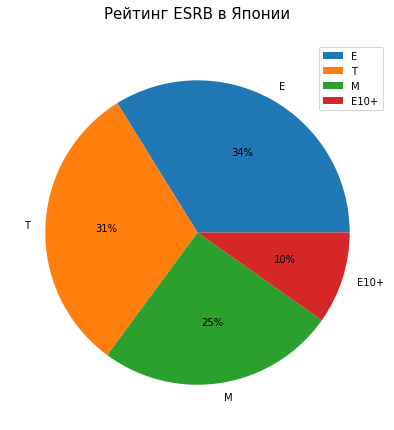

In [52]:
pie_chart(pivot_func('rating'))
plt.title('Рейтинг ESRB в Японии' + "\n", fontsize=15)
plt.ylabel('');

Большинство игр предназначено для несовершеннолетних: категория E 42%, категория T (teens) 29%, только 15% игр выпускается для взрослых.

**Промежуточный вывод**

Сравнивая продажи по трем регионам, можно проследить следующее:
1. Портреты пользователей Северной Америки и Европы достаточно сильно похожи:
    * тройка лидирующих платформ совпадает
    * популярные жанры также совпадают
    * почти равные доли занимают игры для детей и для взрослых
2. Япония разительно отличается от предыдущих регионах:
    * основные платформы и жанры отличаются от западно-европейских 
    * большинство игр предназначено для несовершеннолетних

####

### Проверка гипотез

Гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Условия обеих гипотез проверяются на равенство средних значений, альтернативная гипотеза же будет двухсторонней. Обе выборки достаточно большие, поэтому будем считать по умолчанию, что их дисперсии равны. Также в выборках присутстсвуют пропущенные значения, вследствие чего добавим параметр nan_policy и установим уровень значимости в 1%.

**Гипотеза:** *средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Проверим гипотезу, используя данные о пользовательских рейтингах данных платформ в период с 2006 по 2016 гг.

Пусть

**H0:** среднее значение `'user_score'` платформы `Xbox One` = среднее значение `'user_score'` платформы `PC`

**H1:** среднее значение `'user_score'` платформы `Xbox One` != среднее значение `'user_score'` платформы `PC`

In [45]:
pc = actual_data[['platform', 'user_score', 'critic_score' ,'total_sales']].query('platform == "PC"')
xone = actual_data[['platform', 'user_score', 'critic_score' ,'total_sales']].query('platform == "XOne"')

alpha = .01

results = st.ttest_ind(xone['user_score'],
                       pc['user_score'],
                       nan_policy='omit') # игнорируем nan

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


Значение p-value больше заданного уровня значимости и составляет 1.4%, технически мы не можем отвергнуть нулевую гипотезу. Но это слишком маленькая вероятность, чтобы наверняка утверждать, что пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Вывод**

Гипотеза подтвердилась


**Гипотеза:** *средние пользовательские рейтинги жанров Action и Sports разные*

Проверим гипотезу, используя данные о пользовательских рейтингах данных жанров в период с 2006 по 2016 гг.

Пусть

**H0:** среднее значение `'user_score'` игр жанра `Action` = среднее значение `'user_score'` игр жанра `Sports`

**H1:** среднее значение `'user_score'` игр жанра `Action` != среднее значение `'user_score'` игр жанра `Sports`

In [46]:
action_games = actual_data[['genre', 'user_score']].query('genre == "Action"')
sports_games = actual_data[['genre', 'user_score']].query('genre == "Sports"')

alpha = .01

results = st.ttest_ind(action_games['user_score'],
                       sports_games['user_score'],
                       nan_policy='omit') # игнорируем nan

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользовательские рейтинги жанров Action и Sports разные.

**Вывод**

Гипотеза подтвердилась

####

### Общий вывод

Инсайты, полученные в ходе анализа:
1. Жизненный цикл платформы, занимающейся созданием и продажей компьютерных игр, в среднем составляет 10 лет
2. На данный момент все платформы терпят снижение глобальных продаж, перспективными платформами можно назвать PS4 и XOne.
3. Япония следует рассматривать как отдельный и самостоятельный рынок, потребители которого по своим потребностям не похожи на западно-европейских.
4. Самыми популярными жанрами игр являются Action, Sports и Shooter
5. Самая распространенная возрастная категория игр - для всех, т.е. включая детей
6. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
7. Средние пользовательские рейтинги жанров Action и Sports разные